# Neural Network to Recognise Hand Written Digits Using Keras

#### In this session, we will be using keras, a top level wrapper for Tensorflow to build a Feed Forward Neural Network that can classify hand-written digits.

## You will need :
* keras 
* pandas - Used to Collect and Load Data
* matplotlib - Used for data visualisation
* numpy - Used for Matrix Operations

### Let's Get Started!

First we have to import all the packages that we need:

In [6]:
import keras
from keras.datasets import mnist
from keras.models import Sequential     # Case Sensitive! 'S' is Capital!
from keras.layers import Dense
from keras.optimizers import Adam

%matplotlib inline
import matplotlib.pyplot as plt

### Now we have to set up some Hyper Parameters

Hyper-parameters are certain constants in the neural network. They can be adjusted to get different results from the neural network.

In [7]:
batch_size = 128
num_classes = 10
epochs = 5


#These values will help us in plotting images
img_size = 28
img_shape = (img_size, img_size)

This function is used to download the data. It returns four numpy arrays containing both the training and the test data.

The 'x' values contain the images as a vector. Each image is 28x28 pixels in size, meaning that when unfolded into a vector, we get 784 values.

There are 60,000 train images and 10,000 test images.

The 'y' values are one-hot encoded vectors which gives us the corresponding class of the image in the 'x' arrays.

We now have to reshape the numpy array into the share that we want it to be in.

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

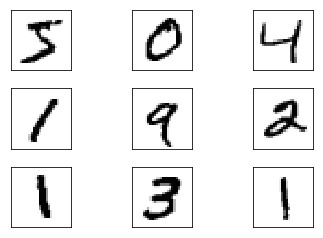

60000 train samples
10000 test samples


In [9]:
x_train = x_train.reshape(60000, 784)

x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

plot_images(x_train[0:9])

#Normalising

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



In [10]:
def plot_images(images):
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

Now we convert the classes into matrices

In [11]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Building the Neural Network!!!

The Model is built using the Sequential Function

We add layers to the model step by step.

In [12]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Now that we have our model built, we can start to train our model. This is done using the compile() function.

We use a categorical crossentropy loss function.
The optimiser we use is Adam.
And the metric that the neural network tries to optimise is the accuracy.

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 218us/step - loss: 0.2184 - acc: 0.9356 - val_loss: 0.1085 - val_acc: 0.9659
Epoch 2/5
60000/60000 [==============================] - 12s 194us/step - loss: 0.0781 - acc: 0.9766 - val_loss: 0.0827 - val_acc: 0.9767
Epoch 3/5
60000/60000 [==============================] - 11s 189us/step - loss: 0.0514 - acc: 0.9834 - val_loss: 0.0657 - val_acc: 0.9795
Epoch 4/5
60000/60000 [==============================] - 11s 188us/step - loss: 0.0365 - acc: 0.9884 - val_loss: 0.0727 - val_acc: 0.9786
Epoch 5/5
60000/60000 [==============================] - 11s 189us/step - loss: 0.0260 - acc: 0.9919 - val_loss: 0.0763 - val_acc: 0.9774


Now we can see our results!

## print('Test loss:', score[0])
print('Test accuracy:', score[1])